In [83]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import load_data

X_train,y_train,X_test,y_test = load_data()
print(X_train.shape)
print(y_train.shape)
X_train

(1000, 64, 64)
(1000, 1)


array([[[164, 174, 163, ..., 144, 131, 134],
        [162, 174, 182, ..., 143, 144, 128],
        [158, 169, 187, ..., 158, 143, 151],
        ...,
        [175, 168, 166, ...,  91, 176, 173],
        [167, 166, 166, ...,  45, 184, 124],
        [176, 172, 168, ...,  87, 180,  39]],

       [[ 42,  43,  39, ...,  47,  46,  42],
        [ 38,  44,  42, ...,  40,  47,  42],
        [ 45,  46,  36, ...,  43,  40,  38],
        ...,
        [ 87,  85,  70, ...,  75,  78,  82],
        [ 70,  70,  71, ...,  52,  67,  68],
        [ 64,  61,  60, ...,  55,  52,  55]],

       [[ 27,  26,  29, ...,  84,  82,  84],
        [ 29,  27,  28, ...,  89,  88,  89],
        [ 28,  32,  27, ...,  88,  90,  86],
        ...,
        [101,  92,  17, ..., 112, 119, 123],
        [173, 178, 175, ..., 141, 137, 138],
        [ 10,  11,  26, ..., 135, 141, 121]],

       ...,

       [[ 47,  68, 142, ...,  39,  35,  33],
        [ 55,  68, 159, ...,  54,  41,  44],
        [ 58,  75, 141, ...,  40,  58,  63

In [84]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
X_train.max()

np.uint8(254)

In [85]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
max = X_train.max()
X_train = X_train / max
X_test = X_test / max
X_test



array([[0.18503937, 0.18503937, 0.2007874 , ..., 0.61023622, 0.61417323,
        0.60629921],
       [0.51181102, 0.58267717, 0.49212598, ..., 0.4488189 , 0.30314961,
        0.46062992],
       [0.8503937 , 0.52362205, 0.78740157, ..., 0.75984252, 0.65354331,
        0.69685039],
       ...,
       [0.15748031, 0.2007874 , 0.78346457, ..., 0.53937008, 0.84251969,
        0.49212598],
       [0.81102362, 0.81102362, 0.81102362, ..., 0.44094488, 0.43700787,
        0.40944882],
       [0.43307087, 0.3976378 , 0.46062992, ..., 0.4015748 , 0.13385827,
        0.21653543]], shape=(200, 4096))

In [12]:
def initialisation(X):
    w = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (w,b)

In [24]:
W,b = initialisation(X_train)

In [54]:
def model(X,W,b):
    Z = np.dot(X,W) + b
    # print(Z.min())
    A = 1 / (1 + np.exp(-Z))
    return A

In [29]:
def log_loss(A,y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [30]:
loss = log_loss(A,y_train)

In [15]:
def gradient(A,X,y):
    dw = 1 / len(y) * np.dot(X.T , A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dw,db)

In [16]:
def update(W,b,dw,db,learning_rate=0.1):
    W = W - learning_rate * dw
    b = b - learning_rate * db
    return (W,b)


In [17]:
def predict(X,w,b):
    A = model(X,w,b)
    return A >= 0.5

In [68]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [86]:
def artificial_neuron(X_train,X_test,y_train,y_test,n_iter=100,learning_rate=0.1):
    W,b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train,W,b)

        if i%10 == 0 :

            train_loss.append(log_loss(A,y_train))
            y_pred = predict(X_train,W,b)
            train_acc.append(accuracy_score(y_train,y_pred))

            A_test = model(X_test,W,b)
            test_loss.append(log_loss(A_test,y_test))
            y_pred = predict(X_test,W,b)
            test_acc.append(accuracy_score(y_test,y_pred))

        dw,db = gradient(A,X_train,y_train)
        W,b = update(W,b,dw,db,learning_rate)
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)

    plt.plot(train_loss , label='train loss')
    plt.plot(test_loss , label='test loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc , label='train accuracy')
    plt.plot(test_acc , label='test accuracy')
    plt.show()

    return (W,b)


100%|██████████| 1000/1000 [00:02<00:00, 400.15it/s]


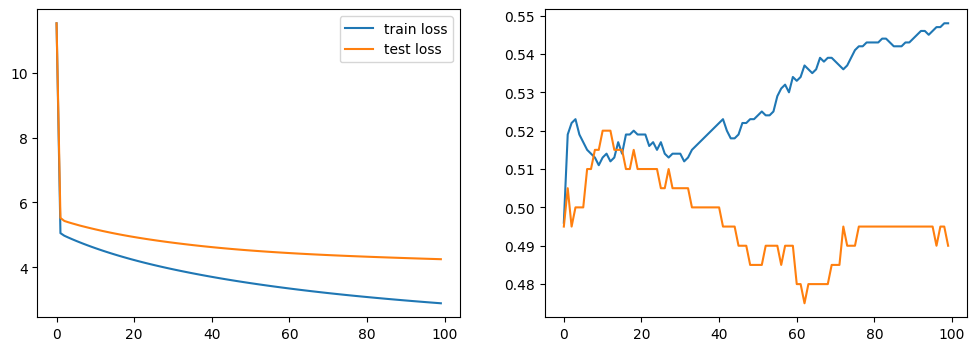

In [88]:
W,b = artificial_neuron(X_train,X_test,y_train,y_test,n_iter=1000,learning_rate=0.01)